In [51]:
%load_ext autoreload
%autoreload 2

In [22]:
from portfolio_optimisation.classes.dl_stock_predictor import StockPredictor

In [23]:
import pandas as pd
# average_title_embeddings_merged.csv
df_average = pd.read_csv('../../datasets/average_title_embeddings_merged.csv')

In [76]:
# get 2023 year
hard_coded_portfolio = {
    'AAPL': 0.07,
    'MSFT': 0.065,
    'AMZN': 0.032,
    'NVDA': 0.028,
    'GOOGL': 0.021,
    'TSLA': 0.019,
    'GOOG': 0.018,
    'META': 0.018,
    'UNH': 0.013,
    'XOM': 0.013,
    'LLY': 0.012,
    'JPM': 0.012,
    'JNJ': 0.011,
    'V': 0.011,
    'PG': 0.01,
    'MA': 0.009,
    'AVGO': 0.009,
    'HD': 0.009,
    'CVX': 0.008,
    'MRK': 0.007,
    'ABBV': 0.007,
    'COST': 0.007,
    'PEP': 0.007,
    'ADBE': 0.007
}
portfolio_stocks = list(hard_coded_portfolio.keys())
start_date = '2021-12-31'
df_2022_2023_year = df_average[df_average['date'] >= start_date]
df_2022_2023_year = df_2022_2023_year[df_2022_2023_year['Symbol'].isin(portfolio_stocks)]

In [25]:
from portfolio_optimisation.classes.predictor import FinancialPredictor
regressor_path = "../models/financial_data_only.cbm"
preprocessor_path = "../models/preprocessor_pipeline.pkl"
regressor = FinancialPredictor(regressor_path=regressor_path,
                               preprocessor_path=preprocessor_path)

/Users/sprilut/Library/Caches/pypoetry/virtualenvs/portfolio-optimisation-qXJsKVfj-py3.11/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator FunctionTransformer from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sprilut/Library/Caches/pypoetry/virtualenvs/portfolio-optimisation-qXJsKVfj-py3.11/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ColumnTransformer from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sprilut/Library/Caches/pypoet

In [15]:
import pandas as pd
from datetime import timedelta

# Исходная дата
start_date = pd.Timestamp('2023-01-06')

# Количество недель для итерации
num_weeks = 52

# Итерация по неделям
for i in range(num_weeks):
    end_date = start_date + timedelta(days=7)
    print(f"Week {i+1}: {start_date.date()} to {end_date.date()}")
    # Обновляем стартовую дату для следующей недели
    start_date = end_date


Week 1: 2023-01-06 to 2023-01-13
Week 2: 2023-01-13 to 2023-01-20
Week 3: 2023-01-20 to 2023-01-27
Week 4: 2023-01-27 to 2023-02-03
Week 5: 2023-02-03 to 2023-02-10
Week 6: 2023-02-10 to 2023-02-17
Week 7: 2023-02-17 to 2023-02-24
Week 8: 2023-02-24 to 2023-03-03
Week 9: 2023-03-03 to 2023-03-10
Week 10: 2023-03-10 to 2023-03-17
Week 11: 2023-03-17 to 2023-03-24
Week 12: 2023-03-24 to 2023-03-31
Week 13: 2023-03-31 to 2023-04-07
Week 14: 2023-04-07 to 2023-04-14
Week 15: 2023-04-14 to 2023-04-21
Week 16: 2023-04-21 to 2023-04-28
Week 17: 2023-04-28 to 2023-05-05
Week 18: 2023-05-05 to 2023-05-12
Week 19: 2023-05-12 to 2023-05-19
Week 20: 2023-05-19 to 2023-05-26
Week 21: 2023-05-26 to 2023-06-02
Week 22: 2023-06-02 to 2023-06-09
Week 23: 2023-06-09 to 2023-06-16
Week 24: 2023-06-16 to 2023-06-23
Week 25: 2023-06-23 to 2023-06-30
Week 26: 2023-06-30 to 2023-07-07
Week 27: 2023-07-07 to 2023-07-14
Week 28: 2023-07-14 to 2023-07-21
Week 29: 2023-07-21 to 2023-07-28
Week 30: 2023-07-28 to 

In [78]:
# set index as date
df_2022_2023_year['date'] = pd.to_datetime(df_2022_2023_year['date'], format='%Y-%m-%d')
df_2022_2023_year = df_2022_2023_year.set_index('date')

In [39]:
df_2022_2023_year.head()

,Symbol,Adj Close,Close,High,Low,Open,Volume,lag_1,lag_2,lag_3,...,title_embedding_374,title_embedding_375,title_embedding_376,title_embedding_377,title_embedding_378,title_embedding_379,title_embedding_380,title_embedding_381,title_embedding_382,title_embedding_383
date,,,,,,,,,,,,,,,,,,,,,
2021-12-31,AAPL,175.340332,177.570007,179.229996,177.259995,178.089996,64062300.0,178.199997,179.380005,179.289993,...,-0.003952,0.021394,-0.034539,-0.057481,-0.035366,0.011713,0.076497,-0.103312,-0.000248,0.057139
2022-01-03,AAPL,179.724564,182.009995,182.880005,177.710007,177.830002,104487900.0,177.570007,178.199997,179.380005,...,0.012989,0.039162,-0.015005,-0.039230,-0.039905,0.014562,0.066010,-0.084956,-0.011794,0.082781
2022-01-04,AAPL,177.443573,179.699997,182.940002,179.119995,182.630005,99310400.0,182.009995,177.570007,178.199997,...,0.030699,0.034504,-0.000862,-0.037650,-0.029241,0.011408,0.033200,-0.074585,-0.002423,0.048922
2022-01-05,AAPL,172.723587,174.919998,180.169998,174.639999,179.610001,94537600.0,179.699997,182.009995,177.570007,...,-0.004229,0.013943,-0.026295,-0.036435,-0.031842,0.015743,0.034027,-0.086129,0.011493,0.038671
2022-01-06,AAPL,169.840256,172.000000,175.300003,171.639999,172.699997,96904000.0,174.919998,179.699997,182.009995,...,0.004323,0.032883,0.001986,-0.033137,-0.026377,0.010119,0.038187,-0.106370,0.026987,0.035555


In [46]:
df_2022_2023_year['Adj Close'].head()

date
2021-12-31    175.340332
2022-01-03    179.724564
2022-01-04    177.443573
2022-01-05    172.723587
2022-01-06    169.840256
Name: Adj Close, dtype: float64

In [50]:
# import pandas as pd
# from pypfopt.expected_returns import ema_historical_return, mean_historical_return
# from pypfopt.risk_models import CovarianceShrinkage
# from pypfopt.efficient_frontier import EfficientFrontier
# from datetime import timedelta

# class PyPFOtpPortfolioUpdater:
#     def __init__(self, initial_data):
#         self.data = initial_data
#         self.weekly_prices = self.data['Adj Close'].resample('W').last()
#         self.weights = None

#     def add_new_week_data(self, new_data):
#         self.data = pd.concat([self.data, new_data])
#         self.weekly_prices = self.data['Adj Close'].resample('W').last()

#     def optimize_portfolio(self):
#         mean_returns = mean_historical_return(self.weekly_prices)
#         cov_matrix = CovarianceShrinkage(self.weekly_prices).ledoit_wolf()
#         ef = EfficientFrontier(mean_returns, cov_matrix)
#         ef.max_sharpe()
#         self.weights = ef.clean_weights()
#         return self.weights

# start_date = pd.Timestamp('2023-01-06')
# end_date = start_date + timedelta(days=7)

# # Example usage
# portfolio_updater = PyPFOtpPortfolioUpdater(df_2022_2023_year[df_2022_2023_year.index <= start_date])
# updated_weights = portfolio_updater.optimize_portfolio()
# print("Old Weights:", updated_weights)

# portfolio_updater.add_new_week_data(df_2022_2023_year[(df_2022_2023_year.index > start_date) & (df_2022_2023_year.index <= end_date)])
# updated_weights = portfolio_updater.optimize_portfolio()
# print("Updated Weights:", updated_weights)


Old Weights: OrderedDict([('Adj Close', 1.0)])
Updated Weights: OrderedDict([('Adj Close', 1.0)])


/Users/sprilut/Library/Caches/pypoetry/virtualenvs/portfolio-optimisation-qXJsKVfj-py3.11/lib/python3.11/site-packages/pypfopt/expected_returns.py:123: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)
/Users/sprilut/Library/Caches/pypoetry/virtualenvs/portfolio-optimisation-qXJsKVfj-py3.11/lib/python3.11/site-packages/pypfopt/risk_models.py:389: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)
/Users/sprilut/Library/Caches/pypoetry/virtualenvs/portfolio-optimisation-qXJsKVfj-py3.11/lib/python3.11/site-packages/pypfopt/expected_returns.py:123: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)
/Users/sprilut/Library/Caches/pypoetry/virtualenvs/portfolio-optimisation-qXJsKVfj-py3.11/lib/python3.11/site-packages/pypfopt/risk_models.py:389: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in 

In [72]:
len(df_2022_2023_year['Symbol'].unique())

24

In [96]:
from datetime import date
import pandas as pd
from datetime import timedelta

from portfolio_optimisation.classes.portfolio_optimizer import PortfolioOptimizer

start_date = '2022-01-01'

end_date = pd.Timestamp('2023-01-04')

num_weeks = 52
pred_sums = []
base_sums = []
for i in range(num_weeks):
    print(f"Week {i+1}: {end_date.date()}")
    # Обновляем стартовую дату для следующей недели
    optimizer = PortfolioOptimizer(portfolio_stocks, start_date, end_date)
    optimizer.initialize()
    weekly_return = regressor.predict(df_2022_2023_year[df_2022_2023_year.index == end_date])
    predicted_weights = optimizer.run_optimization(weekly_return * 100)
    baseline_weights = optimizer.run_optimization()
    results = df_2022_2023_year[df_2022_2023_year.index == end_date][['weekly_return', 'Symbol']]
    predicted_sum = 0
    baseline_sum = 0

    for stock, weight in predicted_weights.items():
        ret = (results[results['Symbol'] == stock]['weekly_return'].values + 1)
        predicted_sum += ret * weight
        baseline_sum += ret * baseline_weights[stock]
    pred_sums.append(predicted_sum)
    base_sums.append(baseline_sum)
    end_date += + timedelta(days=7)


Week 1: 2023-01-04


[*********************100%%**********************]  24 of 24 completed


Week 2: 2023-01-11


[*********************100%%**********************]  24 of 24 completed


Week 3: 2023-01-18


[*********************100%%**********************]  24 of 24 completed


Week 4: 2023-01-25


[*********************100%%**********************]  24 of 24 completed


Week 5: 2023-02-01


[*********************100%%**********************]  24 of 24 completed


Week 6: 2023-02-08


[*********************100%%**********************]  24 of 24 completed


Week 7: 2023-02-15


[*********************100%%**********************]  24 of 24 completed


Week 8: 2023-02-22


[*********************100%%**********************]  24 of 24 completed


Week 9: 2023-03-01


[*********************100%%**********************]  24 of 24 completed


Week 10: 2023-03-08


[*********************100%%**********************]  24 of 24 completed


Week 11: 2023-03-15


[*********************100%%**********************]  24 of 24 completed


Week 12: 2023-03-22


[*********************100%%**********************]  24 of 24 completed


Week 13: 2023-03-29


[*********************100%%**********************]  24 of 24 completed


Week 14: 2023-04-05


[*********************100%%**********************]  24 of 24 completed


Week 15: 2023-04-12


[*********************100%%**********************]  24 of 24 completed


Week 16: 2023-04-19


[*********************100%%**********************]  24 of 24 completed


Week 17: 2023-04-26


[*********************100%%**********************]  24 of 24 completed


Week 18: 2023-05-03


[*********************100%%**********************]  24 of 24 completed


Week 19: 2023-05-10


[*********************100%%**********************]  24 of 24 completed


Week 20: 2023-05-17


[*********************100%%**********************]  24 of 24 completed


Week 21: 2023-05-24


[*********************100%%**********************]  24 of 24 completed


Week 22: 2023-05-31


[*********************100%%**********************]  24 of 24 completed


Week 23: 2023-06-07


[*********************100%%**********************]  24 of 24 completed


Week 24: 2023-06-14


[*********************100%%**********************]  24 of 24 completed


Week 25: 2023-06-21


[*********************100%%**********************]  24 of 24 completed


Week 26: 2023-06-28


[*********************100%%**********************]  24 of 24 completed


Week 27: 2023-07-05


[*********************100%%**********************]  24 of 24 completed


Week 28: 2023-07-12


[*********************100%%**********************]  24 of 24 completed


Week 29: 2023-07-19


[*********************100%%**********************]  24 of 24 completed


Week 30: 2023-07-26


[*********************100%%**********************]  24 of 24 completed


Week 31: 2023-08-02


[*********************100%%**********************]  24 of 24 completed


Week 32: 2023-08-09


[*********************100%%**********************]  24 of 24 completed


Week 33: 2023-08-16


[*********************100%%**********************]  24 of 24 completed


Week 34: 2023-08-23


[*********************100%%**********************]  24 of 24 completed


Week 35: 2023-08-30


[*********************100%%**********************]  24 of 24 completed


Week 36: 2023-09-06


[*********************100%%**********************]  24 of 24 completed


Week 37: 2023-09-13


[*********************100%%**********************]  24 of 24 completed


Week 38: 2023-09-20


[*********************100%%**********************]  24 of 24 completed


Week 39: 2023-09-27


[*********************100%%**********************]  24 of 24 completed


Week 40: 2023-10-04


[*********************100%%**********************]  24 of 24 completed


Week 41: 2023-10-11


[*********************100%%**********************]  24 of 24 completed


Week 42: 2023-10-18


[*********************100%%**********************]  24 of 24 completed


Week 43: 2023-10-25


[*********************100%%**********************]  24 of 24 completed


Week 44: 2023-11-01


[*********************100%%**********************]  24 of 24 completed


Week 45: 2023-11-08


[*********************100%%**********************]  24 of 24 completed


Week 46: 2023-11-15


[*********************100%%**********************]  24 of 24 completed


Week 47: 2023-11-22


[*********************100%%**********************]  24 of 24 completed


Week 48: 2023-11-29


[*********************100%%**********************]  24 of 24 completed


Week 49: 2023-12-06


[*********************100%%**********************]  24 of 24 completed


Week 50: 2023-12-13


[*********************100%%**********************]  24 of 24 completed


Week 51: 2023-12-20


[*********************100%%**********************]  24 of 24 completed


Week 52: 2023-12-27


[*********************100%%**********************]  24 of 24 completed


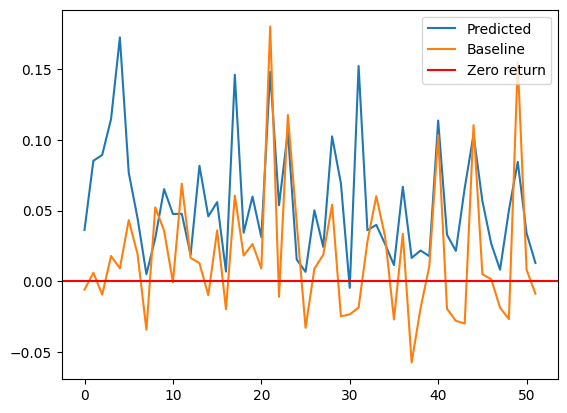

In [103]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(pred_sums) - 1, label='Predicted')
plt.plot(np.array(base_sums) - 1, label='Baseline')
# line on 1
plt.axhline(y=0, color='r', linestyle='-', label='Zero return')
plt.legend()

In [105]:
print("Mean difference", (np.array(pred_sums) - np.array(base_sums)).mean() * 100, "%")

Mean difference 3.6336655861348994 %


In [109]:
# count of sums more than 1
print("Count of sums more than 1", len([s for s in pred_sums if s > 1]))

Count of sums more than 1 51


In [111]:
a = np.random.randn(3, 3)
b = np.random.randn(3, 1)
c = a * b
c.shape

(3, 3)